# Сбор и анализ постов профиля или группы ВКонтакте

Автор: Шмаков Сергей
* http://freesmm.ru
* https://vk.com/smmblog
* https://vk.com/freesmm - сборник бесплатных скриптов для SMM
* https://youtube.com/smmblog

* **Вопросы по скрипту/доработки** : https://new.vk.com/topic-41212221_34124672

> Хотите научиться самостоятельно делать такие скрипты? Проходите бесплатный курс, который я составил и будем всем счастье! http://freesmm.tilda.ws/page241764.html

Для корректной работы скрипта необходимо получить ТОКЕН и вставить его в одном из блоков

Как получить токен, для запуска приложений:
* Перейдите по ссылке: https://oauth.vk.com/authorize?client_id=5453402&display=page&redirect_uri=http://localhost&scope=&response_type=token&v=5.53
* Скопируйте токен из адресной строки и вставьте в ячейку

> Токен никуда не передаётся. О нём знаете только Вы и приложение ВКонтакте, которое не отображает токенов. Только количество установок приложения

![alt](https://api.monosnap.com/rpc/file/download?id=H72wV79ObVw7rLBfJO8T4jOJ25szXW)


## Что делает скрипт

* Собирает основные данные о постах из группы или профиля ВК
 * Дата и время публикации
 * Количество лайков
 * Количество репостов
 * Количество комментариев
 * Длина текста
* Записывает полученные данные в CSV (можете открывать в Excel)
* Анализ постов

Последовательно запустите блоки ниже

In [58]:
import requests
import time #импортируем пакеты
import csv
import datetime as dt
from datetime import datetime, date, time, timedelta



In [59]:
token = 'bce88fab620ffb6de808026706b0f3b83912ea85d553e1249082ee1267f2d9e5c3cc718ecb9a5e3b61fec2b9cff1e' #вставить свой токен

In [63]:
def get_wall(owner_id, token):
    print ('Время запуска скрипта Шмакова',datetime.strftime(datetime.now(), "%H:%M:%S"))

    post_data = [] #пустой список
    
    #отправка запроса к хранимой процедуре, которая делает запрос на первые 2500 постов
    r = requests.post('https://api.vk.com/method/execute.Shmakov_wallGet?owner_id='+str(owner_id)+'&post_count='+str(2500)+'&offset='+str(0)+'&access_token='+token).json()

    response = r['response']
    
    #добавляем в список данные о первых 2500 постах
    post_data.extend(response[1])
    print('Количество собранных постов:', len(post_data))
    post_count = response[0] #количество постов на стене
    
    #если количество постов на стене больше чем 2500, то запускается цикл, который будет работать до тех пор, пока не соберёт все данные
    
    if post_count > 2500:
        print('Количество постов в сообществе больше 2500. Шмаков запускает цикл')
        for offset in range(2500,post_count,2500):
            max_count = offset + 2500

            r = requests.post('https://api.vk.com/method/execute.Shmakov_wallGet?owner_id='
                              +str(owner_id)+'&post_count='+str(max_count)
                              +'&offset='+str(offset)+'&access_token='+token).json()

            response = r['response']

            post_count = response[0]

            post_data.extend(response[1])

            print('Количество собранных постов:', len(post_data))
            time.sleep(0.35) #можно вместо ожидания попробовать потом писать в csv,чтобы не тратить .35 на простое ожидание
    
    else:
        print('Количество постов в сообществе меньше 2500.\nШмаков закончил сбор данных. \nИтого собрано постов:',len(post_data))
    
    #записываем все данные в csv
    
    #открываем csv и пишем название столбцов
    with open('post_data'+str(owner_id)+'.csv', 'w', newline='') as csvfile:
                        datawriter = csv.writer(csvfile, delimiter=';',
                                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
                        datawriter.writerow(['date']+['time']+['owner_id']+['post_id']+
                                            ['len_text']+['likes_count']+['repost_count']+['comments_count'])

    print ('Шмаков записал столбцы в csv')

    for i in range(0,len(post_data)):
        # здесь нет никакой информации о медиаобъектах

        post_date =  dt.datetime.fromtimestamp( #функция преобразования
                int(post_data[i]['date'])
                ).strftime('%Y-%m-%d') #фортма преобразования Год-Месяц Час-Минута-Секунда

        post_time =  dt.datetime.fromtimestamp( #функция преобразования
                int(post_data[i]['date'])
                ).strftime('%H:%M:%S') #фортма преобразования Год-Месяц Час-Минута-Секунда 

        comments_count = post_data[i]['comments']['count'] #количество комментариев
        post_id = post_data[i]['id'] #id поста в сообществе


        likes_count = post_data[i]['likes']['count'] #количество лайков

        repost_count = post_data[i]['reposts']['count']  #количество репостов

        len_text = len(post_data[i]['text']) #длина текста

        with open('post_data'+str(owner_id)+'.csv', 'a', newline='') as csvfile:
                        datawriter = csv.writer(csvfile, delimiter=';',
                                            quotechar='|', quoting=csv.QUOTE_MINIMAL)


                        datawriter.writerow([post_date]+[post_time]+[owner_id]+[post_id]+
                                            [len_text]+[likes_count]+[repost_count]+[comments_count])

    print ('Шмаков закончил запись в csv.Можете открыть файл, если это требуется.')
    print ('Шмаков закончил собирать данные в',datetime.strftime(datetime.now(), "%H:%M:%S"))


In [64]:
owner_id = -38369814 # Если группа, то с минусом, если профиль - без минуса.
%time get_wall(owner_id,token)

Время запуска скрипта Шмакова 18:43:11
Количество собранных постов: 2423
Количество постов в сообществе меньше 2500.
Шмаков закончил сбор данных. 
Итого собрано постов: 2423
Шмаков записал столбцы в csv
Шмаков закончил запись в csv.Можете открыть файл, если это требуется.
Шмаков закончил собирать данные в 18:43:21
Wall time: 9.62 s


# Анализ данных

После того как данные собраны, переходим к их обработке и анализу

In [206]:
import pandas as pd


df = pd.read_csv('post_data'+str(owner_id)+'.csv', parse_dates=True, delimiter=';', index_col='date')

In [207]:
df.head()

,time,owner_id,post_id,len_text,likes_count,repost_count,comments_count
date,,,,,,,
2016-06-20,23:23:20,-38369814,19929,1532,79,16,15
2016-07-30,15:16:48,-38369814,20311,190,0,0,0
2016-07-23,20:17:14,-38369814,20254,182,10,3,31
2016-07-21,17:59:06,-38369814,20244,590,7,2,0
2016-07-21,13:35:21,-38369814,20237,273,10,2,9


## Сводная статистика по сообществу


Функция **describe()** показывает:
* count- количество
* mean - среднее значение
* std - выборочное стандартное отклонение
* 25, 50, 75 % - квантиль
* max - максимальное значение
* min - минимальное значение

Сводная статистика по длине текста за всё время:


In [72]:
df['len_text'].describe()

count     2423.000000
mean       409.360297
std       1041.341705
min          0.000000
25%         48.000000
50%        140.000000
75%        389.500000
max      16141.000000
Name: len_text, dtype: float64

Сводная статистика по лайкам за всё время:

In [71]:
df['likes_count'].describe()

count    2423.000000
mean       14.938093
std        40.266693
min         0.000000
25%         2.000000
50%         7.000000
75%        17.000000
max      1471.000000
Name: likes_count, dtype: float64

>по лайкам, репостам, комментариям сводную статистику лучше смотреть по периодам

Сводная статистика по лайкам у последнийх 100 постов:

In [74]:
df['likes_count'][0:100].describe()

count    100.000000
mean      27.630000
std       26.758801
min        0.000000
25%       11.000000
50%       19.000000
75%       33.250000
max      132.000000
Name: likes_count, dtype: float64

Сводная статистика по репостам у последнийх 100 постов:

In [76]:
df['repost_count'][0:100].describe()

count    100.000000
mean       7.080000
std        9.468374
min        0.000000
25%        2.000000
50%        3.000000
75%        8.250000
max       47.000000
Name: repost_count, dtype: float64

Сводная статистика по комментариям у последнийх 100 постов:


In [78]:
df['comments_count'][0:100].describe()

count    100.0000
mean       5.9800
std        7.1647
min        0.0000
25%        1.0000
50%        3.0000
75%        8.2500
max       31.0000
Name: comments_count, dtype: float64

In [107]:
post_time = pd.to_datetime(df.time) # сообщаем панде, что у нас там даты-время

In [108]:
post_time.describe()

count                    2423
unique                   2322
top       2016-07-30 19:10:00
freq                        4
first     2016-07-30 00:01:20
last      2016-07-30 23:58:47
Name: time, dtype: object

## Графики

### Лайки

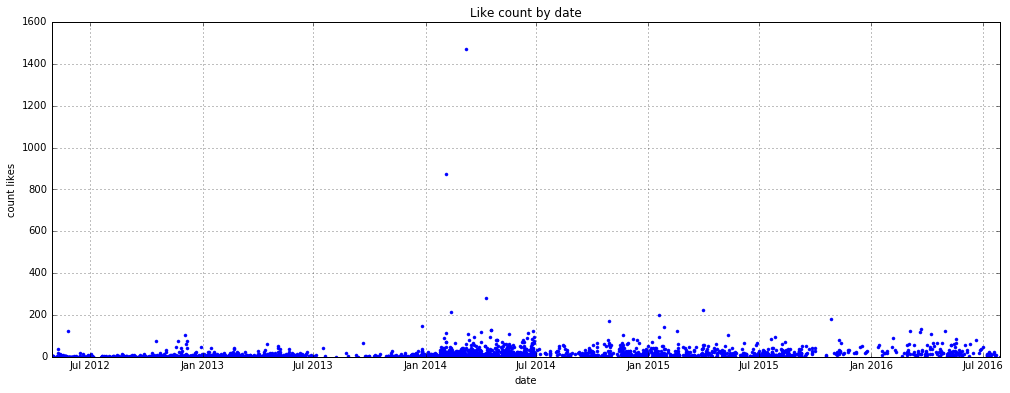

In [208]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

like = df['likes_count']

plt.figure(num=1, figsize=(17, 6)) #размер отрисованного графика

plt.title('Like count by date')
plt.xlabel('date') #подпись оси x
plt.ylabel('count likes') #подпись оси y
plt.grid()
plt.plot(like,'.') #что рисуем и в какой форме: точка и др.

С высокой долей вероятности у вас будут в данных выбросы, которые будут портить общее отображание графика. От них нужно избавиться

In [211]:
like_n = df[df['likes_count'] < 100 ]['likes_count'] # 350 - это граница отсечения

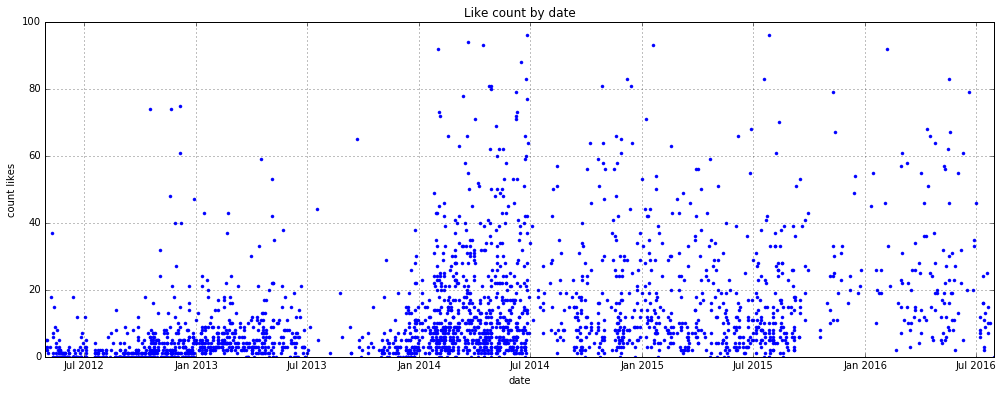

In [212]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

like = df['likes_count']

plt.figure(num=1, figsize=(17, 6)) #размер отрисованного графика

plt.title('Like count by date')
plt.xlabel('date') #подпись оси x
plt.ylabel('count likes') #подпись оси y
plt.grid()
plt.plot(like_n,'.') #что рисуем и в какой форме: точка и др.

### Репосты

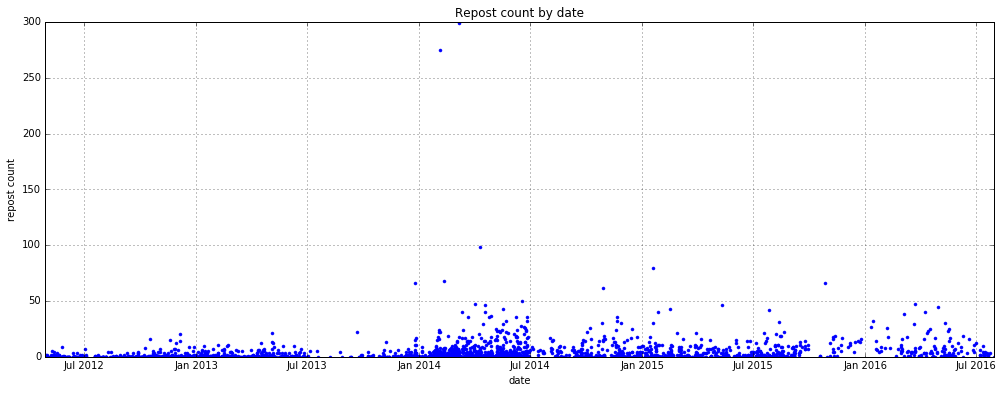

In [161]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

repost = df['repost_count']

plt.figure(num=1, figsize=(17, 6)) #размер отрисованного графика

plt.title('Repost count by date')
plt.xlabel('date') #подпись оси x
plt.ylabel('repost count') #подпись оси y
plt.grid()
plt.plot(repost,'.') #что рисуем и в какой форме: точка и др.

Как и с лайками отбрасываем выбросы

In [94]:
repost_n = df[df['repost_count'] < 100 ]['repost_count'] # 100 - это граница отсечения

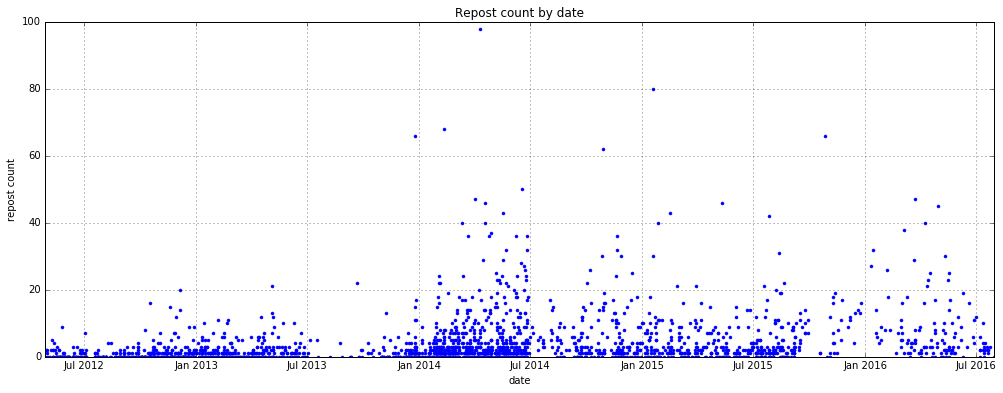

In [162]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

repost = df['repost_count']

plt.figure(num=1, figsize=(17, 6)) #размер отрисованного графика

plt.title('Repost count by date')
plt.xlabel('date') #подпись оси x
plt.ylabel('repost count') #подпись оси y
plt.grid()
plt.plot(repost_n,'.') #что рисуем и в какой форме: точка и др.

### Комментарии

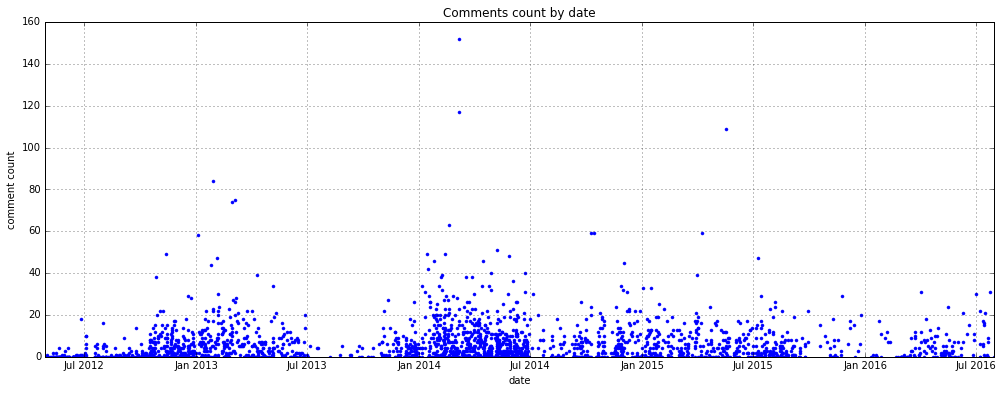

In [163]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

comment = df['comments_count']

plt.figure(num=1, figsize=(17, 6)) #размер отрисованного графика

plt.title('Comments count by date')
plt.xlabel('date') #подпись оси x
plt.ylabel('comment count') #подпись оси y
plt.grid()
plt.plot(comment,'.') #что рисуем и в какой форме: точка и др.


In [109]:
comment_n = df[df['comments_count'] < 80 ]['comments_count'] # 80 - это граница отсечения

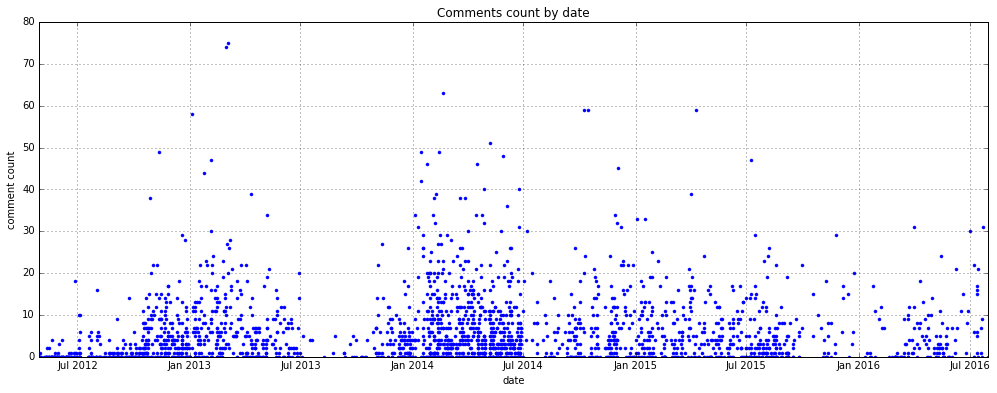

In [164]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

comment = df['comments_count']

plt.figure(num=1, figsize=(17, 6)) #размер отрисованного графика
plt.title('Comments count by date')
plt.xlabel('date') #подпись оси x
plt.ylabel('comment count') #подпись оси y
plt.grid()
plt.plot(comment_n,'.') #что рисуем и в какой форме: точка и др.


# Отношение лайков к репостам

In [112]:
virus = like/repost

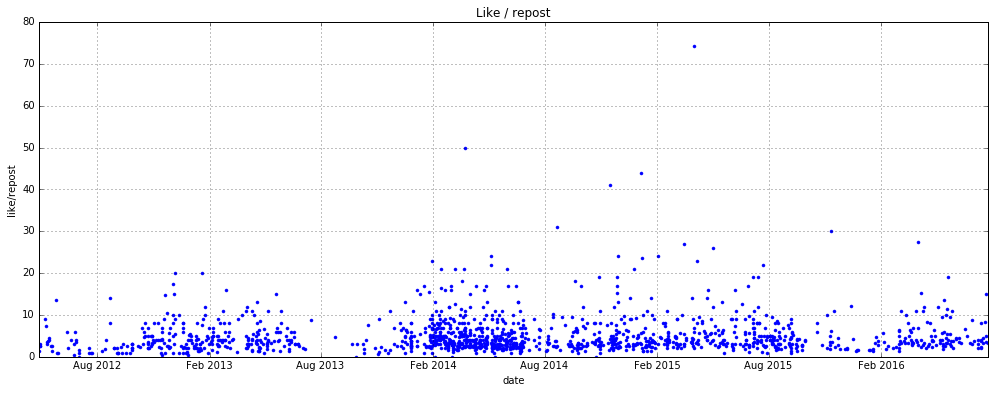

In [165]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

comment = df['comments_count']

plt.figure(num=1, figsize=(17, 6)) #размер отрисованного графика

plt.title('Like / repost')
plt.xlabel('date') #подпись оси x
plt.ylabel('like/repost') #подпись оси y
plt.grid()
plt.plot(virus,'.') #что рисуем и в какой форме: точка и др.

In [128]:
virus_n = virus[virus < 30]

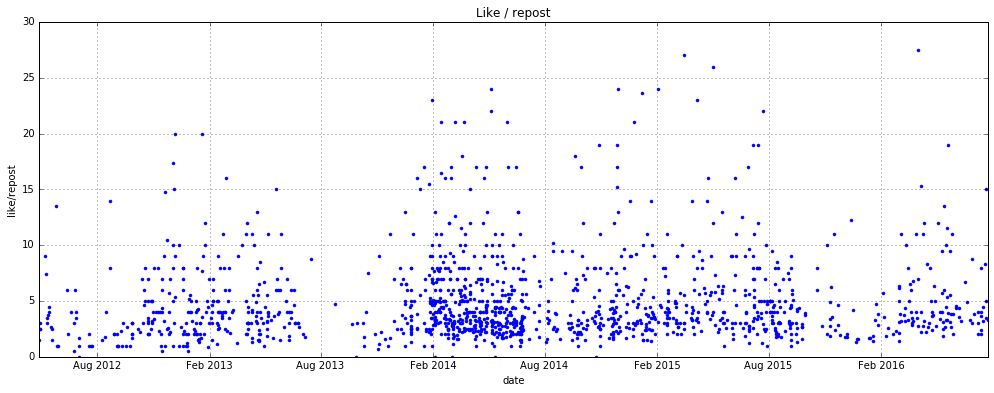

In [166]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

plt.figure(num=1, figsize=(17, 6)) #размер отрисованного графика

plt.title('Like / repost')
plt.xlabel('date') #подпись оси x
plt.ylabel('like/repost') #подпись оси y
plt.grid()
plt.plot(virus_n,'.') #что рисуем и в какой форме: точка и др.

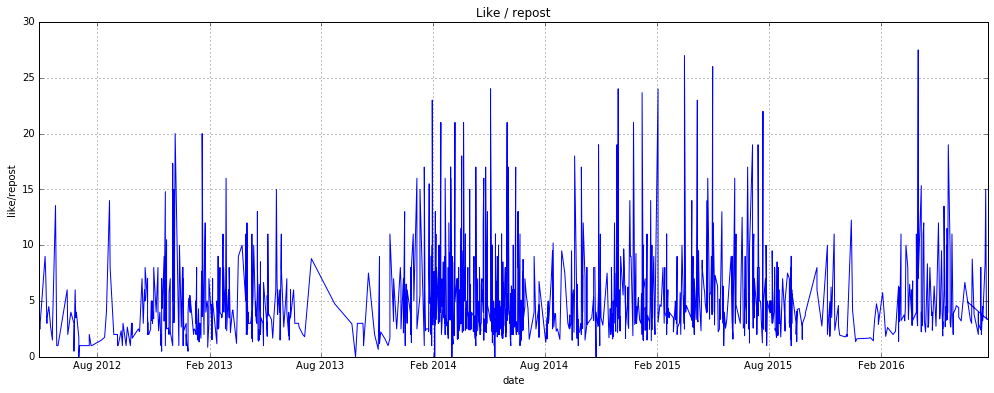

In [167]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

plt.figure(num=1, figsize=(17, 6)) #размер отрисованного графика

plt.title('Like / repost')
plt.xlabel('date') #подпись оси x
plt.ylabel('like/repost') #подпись оси y
plt.grid()
plt.plot(virus_n,'-') #что рисуем и в какой форме: точка и др.

## Время выхода постов

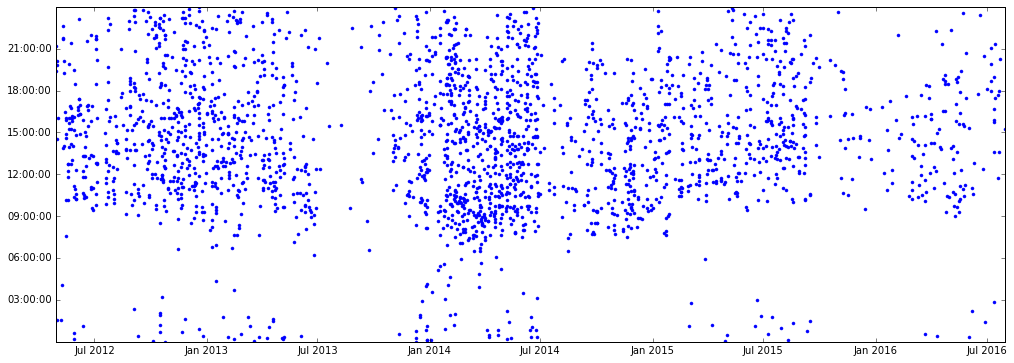

In [134]:
post_time = pd.to_datetime(df.time) # сообщаем панде, что у нас там даты-время
plt.figure(num=1, figsize=(17, 6)) #размер отрисованного графика
plt.plot(post_time, '.')

In [140]:
post_time_n = post_time[post_time > '06:00:00']

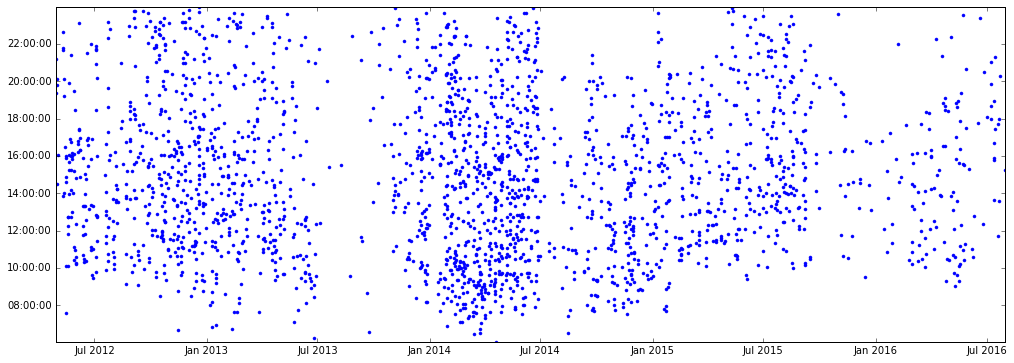

In [141]:
post_time = pd.to_datetime(df.time) # сообщаем панде, что у нас там даты-время
plt.figure(num=1, figsize=(17, 6)) #размер отрисованного графика
plt.plot(post_time_n, '.')

In [143]:
post_time_n = post_time[post_time < '03:00:00']

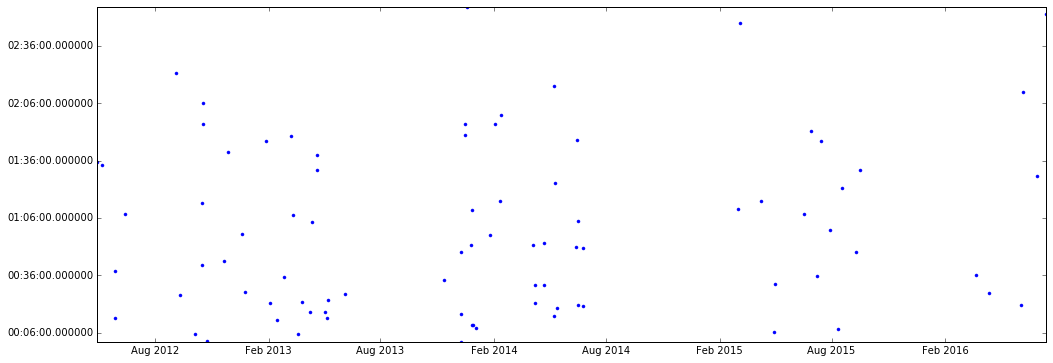

In [144]:
post_time = pd.to_datetime(df.time) # сообщаем панде, что у нас там даты-время
plt.figure(num=1, figsize=(17, 6)) #размер отрисованного графика
plt.plot(post_time_n, '.')

Автор: Шмаков Сергей
* http://freesmm.ru
* https://vk.com/smmblog
* https://youtube.com/smmblog

* **Вопросы по скрипту/доработки** : https://new.vk.com/topic-41212221_34124672

> Хотите научиться самостоятельно делать такие скрипты? Проходите бесплатный курс, который я составил и будем всем счастье! http://freesmm.tilda.ws/page241764.html